In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import traceback
import random
import plotly.express as px

In [103]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [104]:
%%cython

import numpy as np
import time

# Define the NPY_NO_DEPRECATED_API macro before including NumPy headers
cdef extern from *:
    """
    #define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION
    """
from libc.stdlib cimport malloc, free
from libc.string cimport memcpy
cimport numpy as np
from cython cimport boundscheck, wraparound, cdivision

# Disable bounds checking, wraparound, and enable C-like division for performance
@boundscheck(False)  # Deactivate bounds checking
@wraparound(False)   # Deactivate negative indexing
@cdivision(True)     # Enable C-like division
def cython_selection_sort(np.ndarray[np.int64_t, ndim=1] arr):
    """
    Performs Selection Sort on the provided NumPy array while tracking metrics.

    Parameters:
        arr (np.ndarray): The NumPy array of long long integers to sort.

    Returns:
        tuple: (sorted_arr, metrics)
            - sorted_arr (np.ndarray): The sorted NumPy array.
            - metrics (dict): A dictionary containing execution time, number of comparisons, and number of exchanges.
    """
    cdef long long n = arr.shape[0]
    cdef long long comparisons = 0
    cdef long long exchanges = 0
    cdef long long i, j, min_idx, temp
    cdef np.ndarray[np.int64_t, ndim=1] sorted_arr = np.empty(n, dtype=np.int64)

    # Copy the original array to sorted_arr
    memcpy(<void *>sorted_arr.data, <void *>arr.data, n * sizeof(long long))

    cdef double start_time, end_time, execution_time
    start_time = time.perf_counter()

    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            comparisons += 1
            if sorted_arr[j] < sorted_arr[min_idx]:
                min_idx = j
        if min_idx != i:
            temp = sorted_arr[i]
            sorted_arr[i] = sorted_arr[min_idx]
            sorted_arr[min_idx] = temp
            exchanges += 1

    end_time = time.perf_counter()
    execution_time = end_time - start_time

    return sorted_arr, {'execution_time_sec': execution_time, 'comparisons': comparisons, 'exchanges': exchanges}

In [105]:
%%cython
# Define the NPY_NO_DEPRECATED_API macro before including NumPy headers
cdef extern from *:
    """
    #define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION
    """

from libc.stdlib cimport malloc, free
from libc.string cimport memcpy
import numpy as np
cimport numpy as np
from cython cimport boundscheck, wraparound, cdivision
import time

# Disable bounds checking, wraparound, and enable C-like division for performance
@boundscheck(False)  # Deactivate bounds checking
@wraparound(False)   # Deactivate negative indexing
@cdivision(True)     # Enable C-like division
def cython_insertion_sort(np.ndarray[np.int64_t, ndim=1] arr):
    """
    Performs Insertion Sort on the provided NumPy array while tracking metrics.

    Parameters:
        arr (np.ndarray): The NumPy array of long long integers to sort.

    Returns:
        tuple: (sorted_arr, metrics)
            - sorted_arr (np.ndarray): The sorted NumPy array.
            - metrics (dict): A dictionary containing execution time, number of comparisons, and number of exchanges.
    """
    cdef long long n = arr.shape[0]
    cdef long long comparisons = 0
    cdef long long exchanges = 0
    cdef long long i, j, key
    cdef np.ndarray[np.int64_t, ndim=1] sorted_arr = np.empty(n, dtype=np.int64)

    # Copy the original array to sorted_arr
    memcpy(<void *>sorted_arr.data, <void *>arr.data, n * sizeof(long long))

    cdef double start_time, end_time, execution_time
    start_time = time.perf_counter()

    for i in range(1, n):
        key = sorted_arr[i]
        j = i - 1
        while j >= 0:
            comparisons += 1
            if sorted_arr[j] > key:
                sorted_arr[j + 1] = sorted_arr[j]
                exchanges += 1
                j -= 1
            else:
                break
        sorted_arr[j + 1] = key
        exchanges += 1  # For the final assignment

    end_time = time.perf_counter()
    execution_time = end_time - start_time

    return sorted_arr, {'execution_time_sec': execution_time, 'comparisons': comparisons, 'exchanges': exchanges}


In [106]:
%%cython
# Define the NPY_NO_DEPRECATED_API macro before including NumPy headers
cdef extern from *:
    """
    #define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION
    """
import numpy as np
import time
from libc.stdlib cimport malloc, free
from libc.string cimport memcpy
cimport numpy as np
from cython cimport boundscheck, wraparound, cdivision

# Disable bounds checking, wraparound, and enable C-like division for performance
@boundscheck(False)  # Deactivate bounds checking
@wraparound(False)   # Deactivate negative indexing
@cdivision(True)     # Enable C-like division
def cython_heap_sort(np.ndarray[np.int64_t, ndim=1] arr):
    """
    Performs Heap Sort on the provided NumPy array while tracking metrics.

    Parameters:
        arr (np.ndarray): The NumPy array of long long integers to sort.

    Returns:
        tuple: (sorted_arr, metrics)
            - sorted_arr (np.ndarray): The sorted NumPy array.
            - metrics (dict): A dictionary containing execution time, number of comparisons, and number of exchanges.
    """
    cdef long long n = arr.shape[0]
    cdef long long comparisons = 0
    cdef long long exchanges = 0
    cdef long long i, j, largest, temp
    cdef np.ndarray[np.int64_t, ndim=1] sorted_arr = np.empty(n, dtype=np.int64)

    # Copy the original array to sorted_arr
    memcpy(<void *>sorted_arr.data, <void *>arr.data, n * sizeof(long long))

    cdef double start_time, end_time, execution_time
    start_time = time.perf_counter()

    def heapify(arr, n, i):
        nonlocal comparisons, exchanges
        largest = i
        left = 2 * i + 1
        right = 2 * i + 2

        if left < n:
            comparisons += 1
            if arr[left] > arr[largest]:
                largest = left

        if right < n:
            comparisons += 1
            if arr[right] > arr[largest]:
                largest = right

        if largest != i:
            exchanges += 1
            temp = arr[i]
            arr[i] = arr[largest]
            arr[largest] = temp
            heapify(arr, n, largest)

    for i in range(n // 2 - 1, -1, -1):
        heapify(sorted_arr, n, i)

    for i in range(n - 1, 0, -1):
        exchanges += 1
        temp = sorted_arr[i]
        sorted_arr[i] = sorted_arr[0]
        sorted_arr[0] = temp
        heapify(sorted_arr, i, 0)

    end_time = time.perf_counter()
    execution_time = end_time - start_time

    return sorted_arr, {'execution_time_sec': execution_time, 'comparisons': comparisons, 'exchanges': exchanges}

In [107]:
%%cython
# Define the NPY_NO_DEPRECATED_API macro before including NumPy headers
cdef extern from *:
    """
    #define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION
    """
import numpy as np
import time
from libc.stdlib cimport malloc, free
from libc.string cimport memcpy
cimport numpy as np
from cython cimport boundscheck, wraparound, cdivision

# Disable bounds checking, wraparound, and enable C-like division for performance
@boundscheck(False)  # Deactivate bounds checking
@wraparound(False)   # Deactivate negative indexing
@cdivision(True)     # Enable C-like division
def cython_merge_sort(np.ndarray[np.int64_t, ndim=1] arr):
    """
    Performs Merge Sort on the provided NumPy array while tracking metrics.

    Parameters:
        arr (np.ndarray): The NumPy array of long long integers to sort.

    Returns:
        tuple: (sorted_arr, metrics)
            - sorted_arr (np.ndarray): The sorted NumPy array.
            - metrics (dict): A dictionary containing execution time, number of comparisons, and number of exchanges.
    """
    cdef long long n = arr.shape[0]
    cdef long long comparisons = 0
    cdef long long exchanges = 0
    cdef np.ndarray[np.int64_t, ndim=1] sorted_arr = np.empty(n, dtype=np.int64)

    # Copy the original array to sorted_arr
    memcpy(<void *>sorted_arr.data, <void *>arr.data, n * sizeof(long long))

    cdef double start_time, end_time, execution_time
    start_time = time.perf_counter()

    def merge_sort(arr, left, right):
        nonlocal comparisons, exchanges
        if left < right:
            mid = (left + right) // 2
            merge_sort(arr, left, mid)
            merge_sort(arr, mid + 1, right)
            merge(arr, left, mid, right)

    def merge(arr, left, mid, right):
        nonlocal comparisons, exchanges
        n1 = mid - left + 1
        n2 = right - mid

        # Create temporary arrays
        L = np.empty(n1, dtype=np.int64)
        R = np.empty(n2, dtype=np.int64)

        # Copy data to temporary arrays L[] and R[]
        for i in range(n1):
            L[i] = arr[left + i]
        for j in range(n2):
            R[j] = arr[mid + 1 + j]

        # Merge the temporary arrays back into arr[left..right]
        i = 0
        j = 0
        k = left

        while i < n1 and j < n2:
            comparisons += 1
            if L[i] <= R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            exchanges += 1
            k += 1

        # Copy the remaining elements of L[], if there are any
        while i < n1:
            arr[k] = L[i]
            i += 1
            k += 1
            exchanges += 1

        # Copy the remaining elements of R[], if there are any
        while j < n2:
            arr[k] = R[j]
            j += 1
            k += 1
            exchanges += 1

    merge_sort(sorted_arr, 0, n - 1)

    end_time = time.perf_counter()
    execution_time = end_time - start_time

    return sorted_arr, {'execution_time_sec': execution_time, 'comparisons': comparisons, 'exchanges': exchanges}

In [108]:

%%cython
import numpy as np
import time
# Define the NPY_NO_DEPRECATED_API macro before including NumPy headers
cdef extern from *:
    """
    #define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION
    """
from libc.stdlib cimport malloc, free
from libc.string cimport memcpy
cimport numpy as np
from cython cimport boundscheck, wraparound, cdivision

# Disable bounds checking, wraparound, and enable C-like division for performance
@boundscheck(False)  # Deactivate bounds checking
@wraparound(False)   # Deactivate negative indexing
@cdivision(True)     # Enable C-like division
def cython_quick_sort(np.ndarray[np.int64_t, ndim=1] arr):
    """
    Performs Quick Sort on the provided NumPy array while tracking metrics.

    Parameters:
        arr (np.ndarray): The NumPy array of long long integers to sort.

    Returns:
        tuple: (sorted_arr, metrics)
            - sorted_arr (np.ndarray): The sorted NumPy array.
            - metrics (dict): A dictionary containing execution time, number of comparisons, and number of exchanges.
    """
    cdef long long n = arr.shape[0]
    cdef long long comparisons = 0
    cdef long long exchanges = 0
    cdef np.ndarray[np.int64_t, ndim=1] sorted_arr = np.empty(n, dtype=np.int64)

    # Copy the original array to sorted_arr
    memcpy(<void *>sorted_arr.data, <void *>arr.data, n * sizeof(long long))

    cdef double start_time, end_time, execution_time
    start_time = time.perf_counter()

    def partition(np.ndarray[np.int64_t, ndim=1] arr, long long low, long long high):
        nonlocal comparisons, exchanges
        cdef long long pivot = arr[high]
        cdef long long i = low - 1
        cdef long long j, temp

        for j in range(low, high):
            comparisons += 1
            if arr[j] < pivot:
                i += 1
                temp = arr[i]
                arr[i] = arr[j]
                arr[j] = temp
                exchanges += 1

        temp = arr[i + 1]
        arr[i + 1] = arr[high]
        arr[high] = temp
        exchanges += 1

        return i + 1

    def quick_sort(np.ndarray[np.int64_t, ndim=1] arr, long long low, long long high):
        if low < high:
            pi = partition(arr, low, high)
            quick_sort(arr, low, pi - 1)
            quick_sort(arr, pi + 1, high)

    quick_sort(sorted_arr, 0, n - 1)

    end_time = time.perf_counter()
    execution_time = end_time - start_time

    return sorted_arr, {'execution_time_sec': execution_time, 'comparisons': comparisons, 'exchanges': exchanges}

In [109]:
def benchmark_sorting_algorithms(sorting_algorithms, input_sizes, data_types, samples, num_trials):
    """
    Benchmarks multiple sorting algorithms across various input sizes and data types.
    
    Parameters:
    - sorting_algorithms (dict): Dictionary mapping algorithm names to their corresponding functions.
    - input_sizes (list): List of input sizes to test.
    - data_types (list): List of data types (e.g., 'random', 'sorted', etc.) to test.
    - samples (dict): Nested dictionary containing datasets, e.g., samples[size][data_type].
    - num_trials (int): Number of trials to run for each combination.
    
    Returns:
    - pd.DataFrame: DataFrame containing the benchmarking results.
    """
    results = []
    for algo_name, algo_func in sorting_algorithms.items():
        for size in input_sizes:
            for data_type in data_types:
                for trial in range(num_trials):
                    try:
                        data = samples[size][data_type]
                        data_np = np.array(data, dtype=np.int64)
                        sorted_arr, metrics = algo_func(data_np)
                        results.append({
                            'Algorithm': algo_name,
                            'Size': size,
                            'Data Type': data_type,
                            'Trial': trial + 1,
                            'Execution Time (sec)': metrics['execution_time_sec'],
                            'Comparisons': metrics['comparisons'],
                            'Exchanges': metrics.get('exchanges', None)  # Some algorithms may not track exchanges
                        })
                    except Exception as e:
                        print(f"\nError processing {algo_name} with size {size} and data type {data_type}, Trial {trial + 1}: {e}")
                        traceback.print_exc()
    return pd.DataFrame(results)


In [110]:
def generate_random_data(size):
    return np.random.randint(1, size * 10, size=size, dtype=np.int64)

def generate_sorted_data(size):
    return np.arange(1, size + 1, dtype=np.int64)

def generate_reverse_sorted_data(size):
    return np.arange(size, 0, -1, dtype=np.int64)

# Define dataset sizes and types
input_sizes = [
    100, 200, 300, 400, 500, 600, 700, 800, 900,
    1_000, 2_000, 3_000, 4_000, 5_000, 6_000, 7_000, 8_000, 9_000,
    10_000
]
data_types = ['random', 'sorted', 'reverse_sorted']

# Generate samples
samples = {}
for size in input_sizes:
    samples[size] = {}
    for data_type in data_types:
        if data_type == 'random':
            samples[size][data_type] = generate_random_data(size)
        elif data_type == 'sorted':
            samples[size][data_type] = generate_sorted_data(size)
        elif data_type == 'reverse_sorted':
            samples[size][data_type] = generate_reverse_sorted_data(size)

In [111]:
# # Define your sorting algorithms
# sorting_algorithms = {
#     'Cython Selection Sort': cython_selection_sort,  # noqa
#     'Cython Merge Sort': cython_merge_sort,          # noqa
#     'Cython Quick Sort': cython_quick_sort,          # noqa
#     'Cython Insertion Sort': cython_insertion_sort,  # noqa
#     'Cython Heap Sort': cython_heap_sort             # noqa
# }

# Define the number of trials
num_trials = 10

# # Execute the benchmarking
# df_results = benchmark_sorting_algorithms(
#     sorting_algorithms=sorting_algorithms,
#     input_sizes=input_sizes,
#     data_types=data_types,
#     samples=samples,
#     num_trials=num_trials
# )

# print("\nInitial DataFrame:")
# print(df_results.head())


In [112]:
results = {}

In [113]:
selection_sort_dict = { 'Cython Selection Sort': cython_selection_sort }

selection_results = benchmark_sorting_algorithms(
    sorting_algorithms=selection_sort_dict,
    input_sizes=input_sizes,
    data_types=data_types,
    samples=samples,
    num_trials=num_trials
)

results['Selection Sort'] = selection_results

In [114]:
merge_sort_dict = { 'Cython Merge Sort': cython_merge_sort }

merge_results = benchmark_sorting_algorithms(
    sorting_algorithms=merge_sort_dict,
    input_sizes=input_sizes,
    data_types=data_types,
    samples=samples,
    num_trials=num_trials
)

results['Cython Merge Sort'] = merge_results

In [115]:
quick_sort_dict = { 'Cython Quick Sort': cython_quick_sort, }

quick_results = benchmark_sorting_algorithms(
    sorting_algorithms=quick_sort_dict,
    input_sizes=input_sizes,
    data_types=data_types,
    samples=samples,
    num_trials=num_trials
)

results['Cython Quick Sort'] = quick_results

In [116]:
insertion_sort_dict = { 'Cython Insertion Sort': cython_insertion_sort }

insertion_results = benchmark_sorting_algorithms(
    sorting_algorithms=insertion_sort_dict,
    input_sizes=input_sizes,
    data_types=data_types,
    samples=samples,
    num_trials=num_trials
)

results['Cython Insertion Sort'] = insertion_results

In [117]:
heap_sort_dict = { 'Cython Heap Sort': cython_heap_sort }

heap_results = benchmark_sorting_algorithms(
    sorting_algorithms=heap_sort_dict,
    input_sizes=input_sizes,
    data_types=data_types,
    samples=samples,
    num_trials=num_trials
)

results['Cython Heap Sort'] = heap_results

In [118]:
df_results = pd.concat(results.values(), ignore_index=True)


In [119]:
# ============================================
# 4. Data Cleaning
# ============================================

# Define the metrics to check
metrics = ['Execution Time (sec)', 'Comparisons', 'Exchanges']

# Convert specified columns to numeric, coercing errors to NaN
df_results_clean = df_results.copy()
for col in metrics:
    df_results_clean[col] = pd.to_numeric(df_results_clean[col], errors='coerce')

# Drop rows with NaN values in the specified metrics
df_results_clean = df_results_clean.dropna(subset=metrics).reset_index(drop=True)

print("\nDataFrame after removing non-numeric entries:")
print(df_results_clean.head())


DataFrame after removing non-numeric entries:
               Algorithm  Size Data Type  Trial  Execution Time (sec)  \
0  Cython Selection Sort   100    random      1              0.000011   
1  Cython Selection Sort   100    random      2              0.000011   
2  Cython Selection Sort   100    random      3              0.000011   
3  Cython Selection Sort   100    random      4              0.000011   
4  Cython Selection Sort   100    random      5              0.000011   

   Comparisons  Exchanges  
0         4950         96  
1         4950         96  
2         4950         96  
3         4950         96  
4         4950         96  


In [120]:
# ============================================
# 5. Normalizing Metrics
# ============================================

# Define normalized metrics
normalized_metrics = [
    'Execution Time (sec)_normalized', 
    'Comparisons_normalized', 
    'Exchanges_normalized'
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Create a copy to preserve original data
df_results_normalized = df_results_clean.copy()

# Apply Min-Max Scaling to the specified metrics and assign to new columns
df_results_normalized[normalized_metrics] = scaler.fit_transform(df_results_clean[metrics])

# Verify the columns after normalization
print("\nColumns after normalization:")
print(df_results_normalized.columns.tolist())

# Display the first few rows to confirm normalization
print("\nDataFrame after normalization:")
print(df_results_normalized.head())



Columns after normalization:
['Algorithm', 'Size', 'Data Type', 'Trial', 'Execution Time (sec)', 'Comparisons', 'Exchanges', 'Execution Time (sec)_normalized', 'Comparisons_normalized', 'Exchanges_normalized']

DataFrame after normalization:
               Algorithm  Size Data Type  Trial  Execution Time (sec)  \
0  Cython Selection Sort   100    random      1              0.000011   
1  Cython Selection Sort   100    random      2              0.000011   
2  Cython Selection Sort   100    random      3              0.000011   
3  Cython Selection Sort   100    random      4              0.000011   
4  Cython Selection Sort   100    random      5              0.000011   

   Comparisons  Exchanges  Execution Time (sec)_normalized  \
0         4950         96                         0.000104   
1         4950         96                         0.000102   
2         4950         96                         0.000101   
3         4950         96                         0.000100   
4       

In [121]:
# ============================================
# 6. Calculating Descriptive Statistics
# ============================================

# Group the data by 'Algorithm' and 'Data Type'
grouped_algorithms = df_results_normalized.groupby(['Algorithm', 'Data Type'])

# Calculate descriptive statistics for original metrics
stats_original = grouped_algorithms[metrics].agg(['mean', 'median', 'std', 'min', 'max'])

# Calculate descriptive statistics for normalized metrics
stats_normalized = grouped_algorithms[normalized_metrics].agg(['mean', 'median', 'std', 'min', 'max'])

# Reset index to flatten the DataFrame
stats_original = stats_original.reset_index()
stats_normalized = stats_normalized.reset_index()

# Flatten MultiIndex columns
stats_original.columns = ['Algorithm', 'Data Type'] + [
    f'{metric}_{stat}' for metric in metrics for stat in ['mean', 'median', 'std', 'min', 'max']
]
stats_normalized.columns = ['Algorithm', 'Data Type'] + [
    f'{metric}_{stat}' for metric in normalized_metrics for stat in ['mean', 'median', 'std', 'min', 'max']
]

# Merge the original and normalized statistics
stats_combined = pd.merge(stats_original, stats_normalized, on=['Algorithm', 'Data Type'])

print("\n=== Combined Summary Statistics ===")
print(stats_combined.head())


=== Combined Summary Statistics ===
               Algorithm       Data Type  Execution Time (sec)_mean  \
0       Cython Heap Sort          random                   0.014148   
1       Cython Heap Sort  reverse_sorted                   0.013142   
2       Cython Heap Sort          sorted                   0.014754   
3  Cython Insertion Sort          random                   0.002629   
4  Cython Insertion Sort  reverse_sorted                   0.004849   

   Execution Time (sec)_median  Execution Time (sec)_std  \
0                     0.003387                  0.016140   
1                     0.003082                  0.014990   
2                     0.003541                  0.016733   
3                     0.000128                  0.004245   
4                     0.000241                  0.007159   

   Execution Time (sec)_min  Execution Time (sec)_max  Comparisons_mean  \
0                  0.000197                  0.064398      6.799142e+04   
1                  0.0001

In [122]:


# ============================================
# 7. Formatting the Statistics for Display
# ============================================

# Create a separate DataFrame for display purposes
stats_display = stats_combined.copy()

# Apply formatting to stats_display
for col in stats_display.columns:
    if col not in ['Algorithm', 'Data Type']:
        if 'normalized' in col:
            # Format normalized metrics to two decimal places
            stats_display[col] = stats_display[col].apply(lambda x: f"{x:.2f}")
        elif 'Execution Time (sec)' in col:
            # Format Execution Time metrics to four decimal places
            stats_display[col] = stats_display[col].apply(lambda x: f"{x:.4f}" if pd.notnull(x) else 'N/A')
        else:
            # Format Comparisons and Exchanges as integers
            stats_display[col] = stats_display[col].apply(lambda x: f"{int(x)}" if pd.notnull(x) else 'N/A')

# Display the formatted statistics
print("\n=== Combined Summary Statistics (Formatted) ===")
print(stats_display.head())



=== Combined Summary Statistics (Formatted) ===
               Algorithm       Data Type Execution Time (sec)_mean  \
0       Cython Heap Sort          random                    0.0141   
1       Cython Heap Sort  reverse_sorted                    0.0131   
2       Cython Heap Sort          sorted                    0.0148   
3  Cython Insertion Sort          random                    0.0026   
4  Cython Insertion Sort  reverse_sorted                    0.0048   

  Execution Time (sec)_median Execution Time (sec)_std  \
0                      0.0034                   0.0161   
1                      0.0031                   0.0150   
2                      0.0035                   0.0167   
3                      0.0001                   0.0042   
4                      0.0002                   0.0072   

  Execution Time (sec)_min Execution Time (sec)_max Comparisons_mean  \
0                   0.0002                   0.0644            67991   
1                   0.0002           

In [123]:
# ============================================
# 8. Visualizing the Results Separately by Data Type
# ============================================

# Define the list of data types
data_types = ['random', 'sorted', 'reverse_sorted']

# Define plotting functions (from previous steps)
def create_line_plot(df, x, y, hue, title, xlabel, ylabel, log_scale=False, save_path=None):
    plt.figure(figsize=(14, 8))
    sns.lineplot(
        data=df, 
        x=x, 
        y=y, 
        hue=hue, 
        style=hue,
        markers=True, 
        dashes=False,
        linewidth=2.5,
        marker='o',
        markersize=8
    )
    plt.title(title, fontsize=20, fontweight='bold', pad=20)
    plt.xlabel(xlabel, fontsize=16, labelpad=15)
    plt.ylabel(ylabel, fontsize=16, labelpad=15)
    if log_scale:
        plt.xscale('log')
    plt.legend(title=hue, title_fontsize='16', fontsize='14', loc='upper left')
    plt.grid(True, which="both", ls="--", linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path)
    
    plt.show()

def create_bar_plot_with_error(df, x, y, y_err, hue=None, title='', xlabel='', ylabel='', ylim=(0, 1.1), rotation=45, save_path=None):
    plt.figure(figsize=(14, 8))
    barplot_kwargs = {
        'data': df, 
        'x': x, 
        'y': y, 
        'capsize': 0.1, 
        'errorbar': None  # Replacing deprecated `ci` parameter
    }
    
    if hue and hue != x:
        barplot_kwargs['hue'] = hue
        barplot_kwargs['palette'] = 'deep'
    
    ax = sns.barplot(**barplot_kwargs)
    
    # Adding error bars manually
    for index, row in df.iterrows():
        try:
            mean = float(row[y])
            std = float(row[y_err])
            ax.errorbar(
                x=index, 
                y=mean, 
                yerr=std, 
                fmt='none', 
                c='gray', 
                capsize=5, 
                linewidth=1.5
            )
        except ValueError:
            print(f"Non-numeric data encountered for {row[x]}")
            continue

    plt.title(title, fontsize=20, fontweight='bold', pad=20)
    plt.xlabel(xlabel, fontsize=16, labelpad=15)
    plt.ylabel(ylabel, fontsize=16, labelpad=15)
    plt.ylim(ylim)
    plt.xticks(rotation=rotation)
    
    # Only add legend if hue is specified and different from x
    if hue and hue != x:
        plt.legend(title=hue, title_fontsize='16', fontsize='14', loc='upper left')
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path)
    
    plt.show()

def create_interactive_line_plot(df, x, y, color, title, xlabel, ylabel, log_scale=False, save_path=None):
    fig = px.line(
        df, 
        x=x, 
        y=y, 
        color=color,
        markers=True,
        title=title,
        labels={
            x: xlabel,
            y: ylabel,
            color: color
        }
    )
    
    if log_scale:
        fig.update_xaxes(type="log")
    
    fig.update_layout(
        title_font=dict(size=20, family='Arial', color='black'),
        legend_title_text=color
    )
    
    if save_path:
        fig.write_image(save_path)
    
    fig.show()

def create_interactive_bar_plot(df, x, y, error_y, color, title, xlabel, ylabel, y_range=(0, 1.1), save_path=None):
    fig = px.bar(
        df, 
        x=x, 
        y=y,
        error_y=error_y,
        color=color,
        title=title,
        labels={
            x: xlabel,
            y: ylabel,
            color: color
        },
        text=y
    )
    
    fig.update_layout(
        title_font=dict(size=20, family='Arial', color='black'),
        legend_title_text=color,
        yaxis=dict(range=y_range)
    )
    
    if save_path:
        fig.write_image(save_path)
    
    fig.show()


--- Plotting for Data Type: random ---



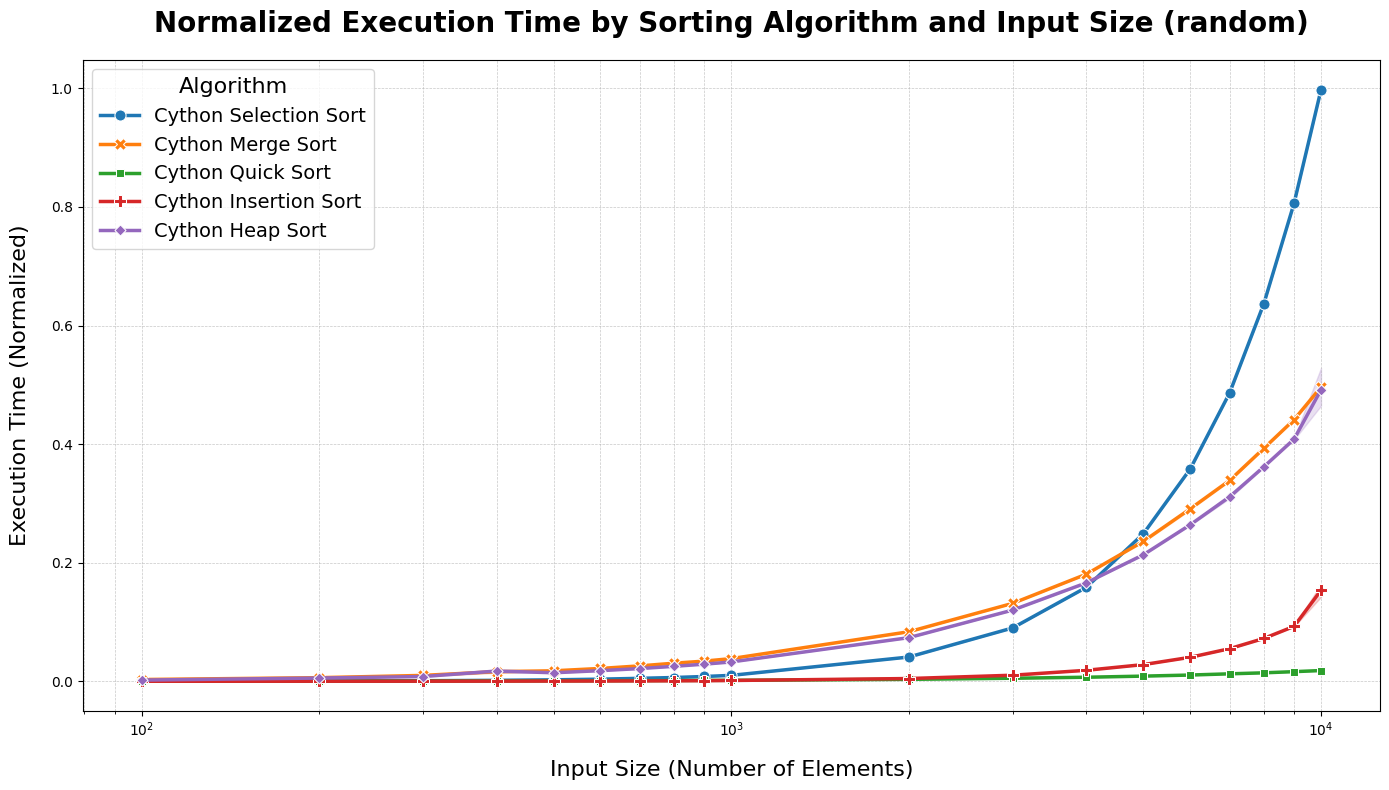

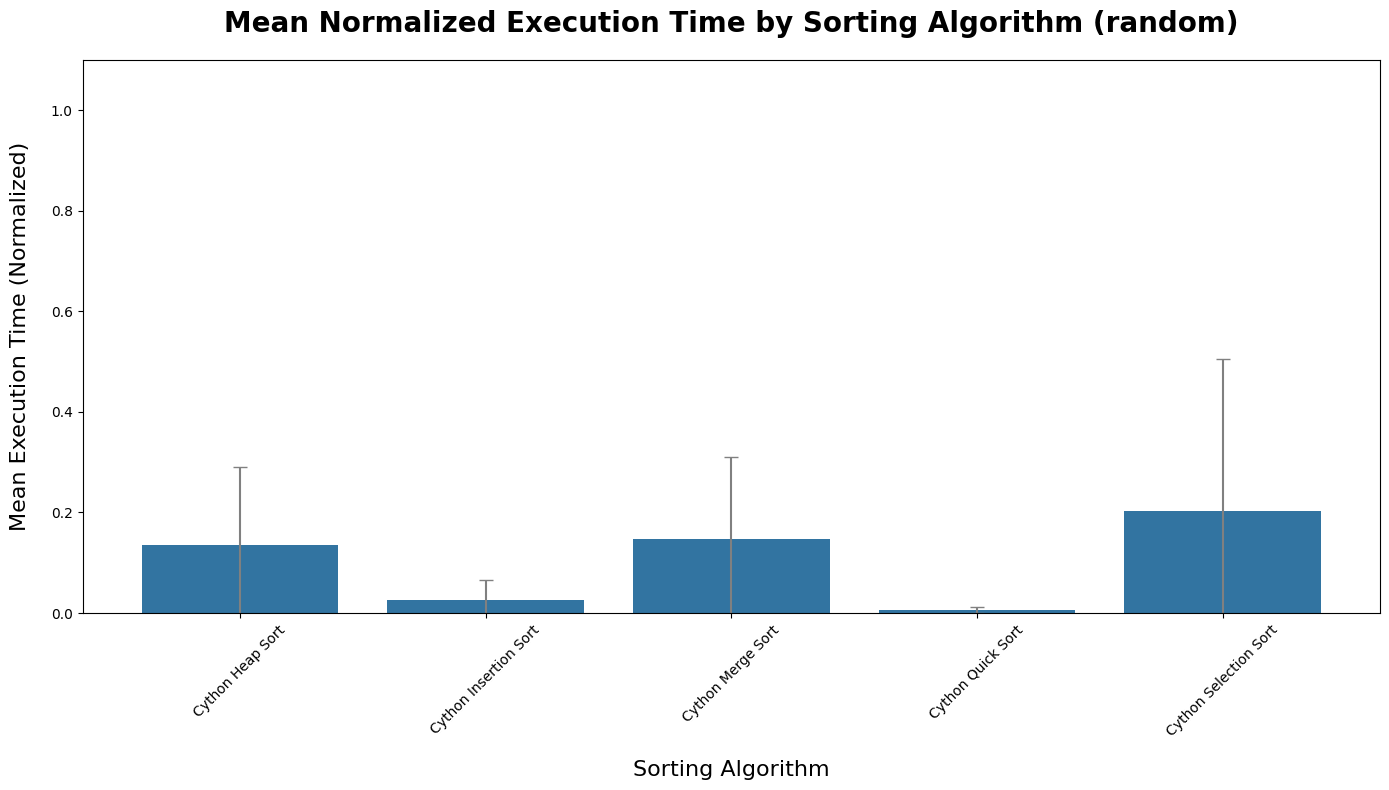


--- Plotting for Data Type: sorted ---



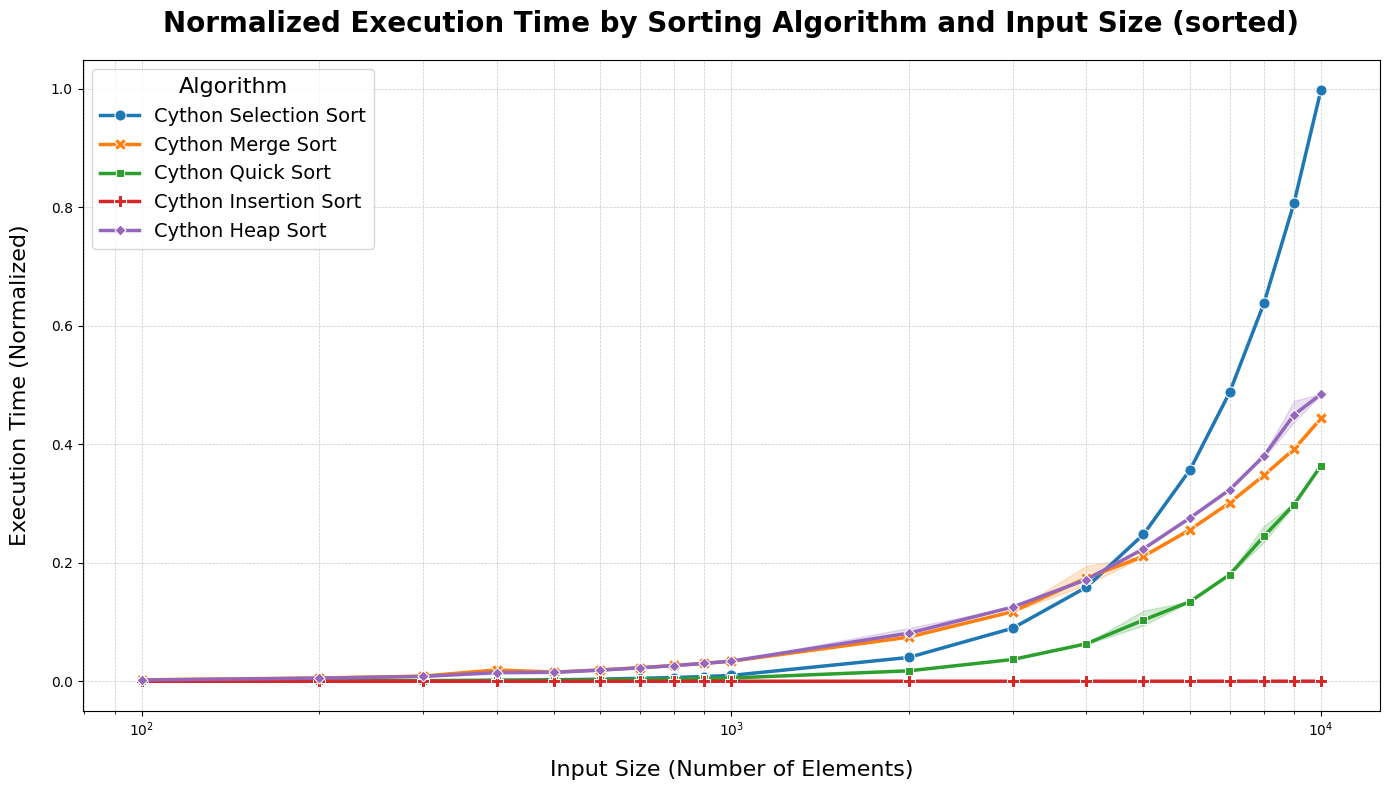

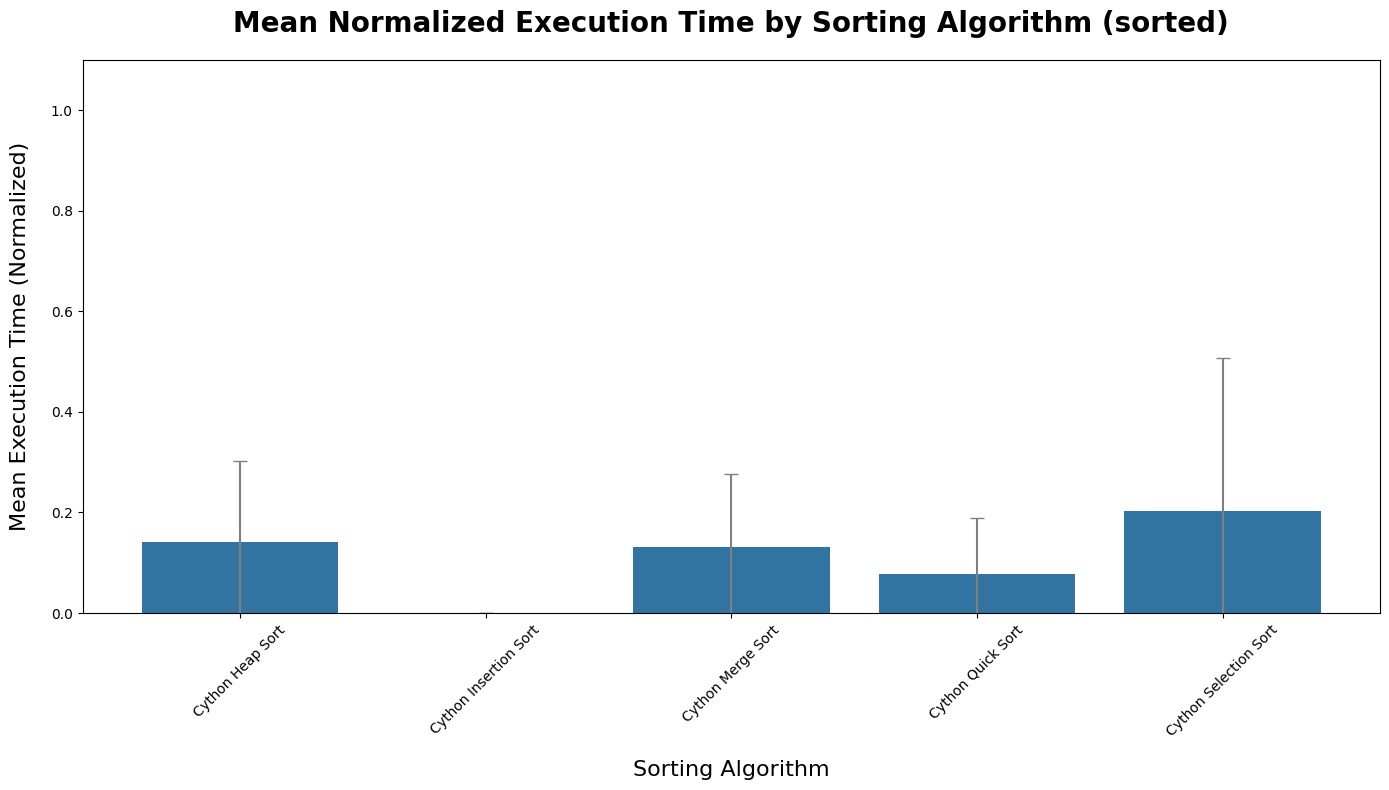


--- Plotting for Data Type: reverse_sorted ---



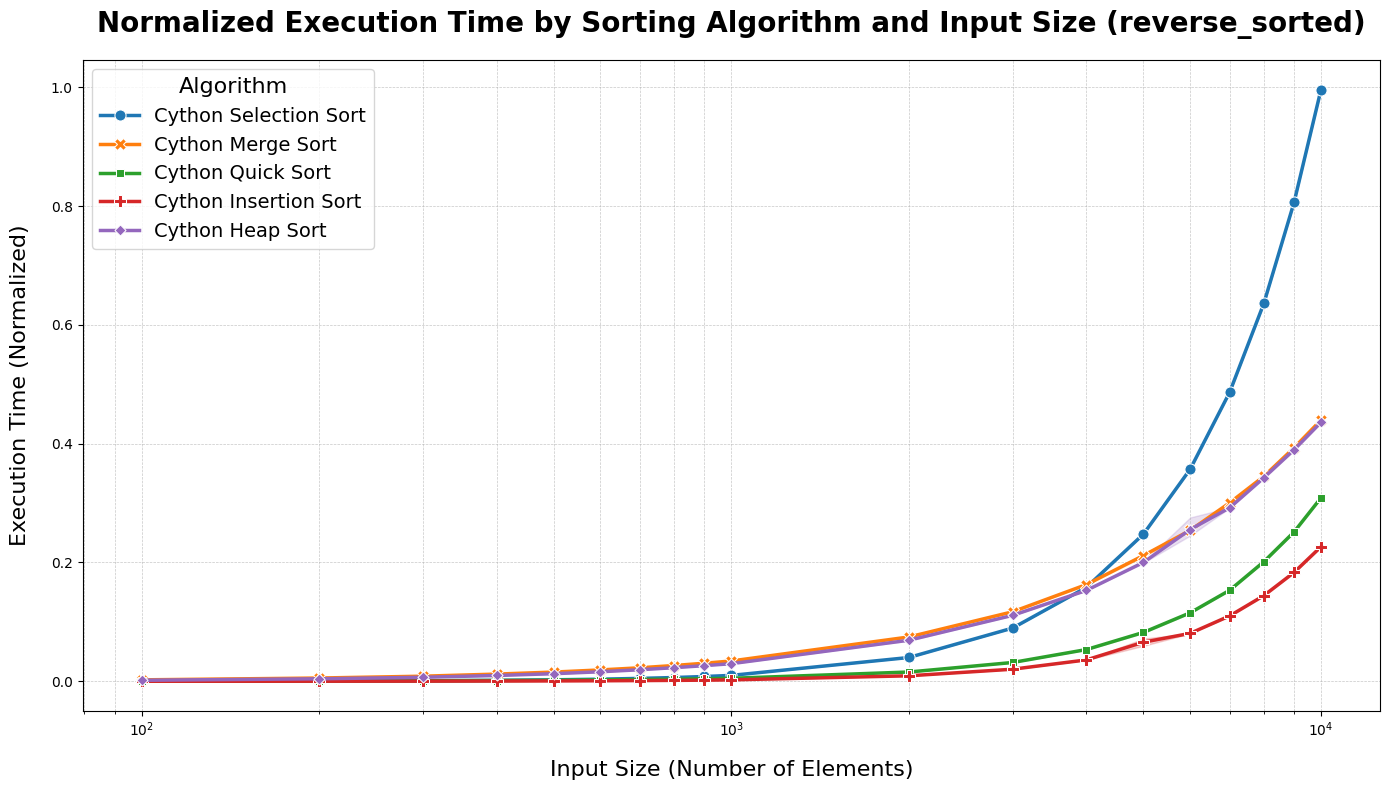

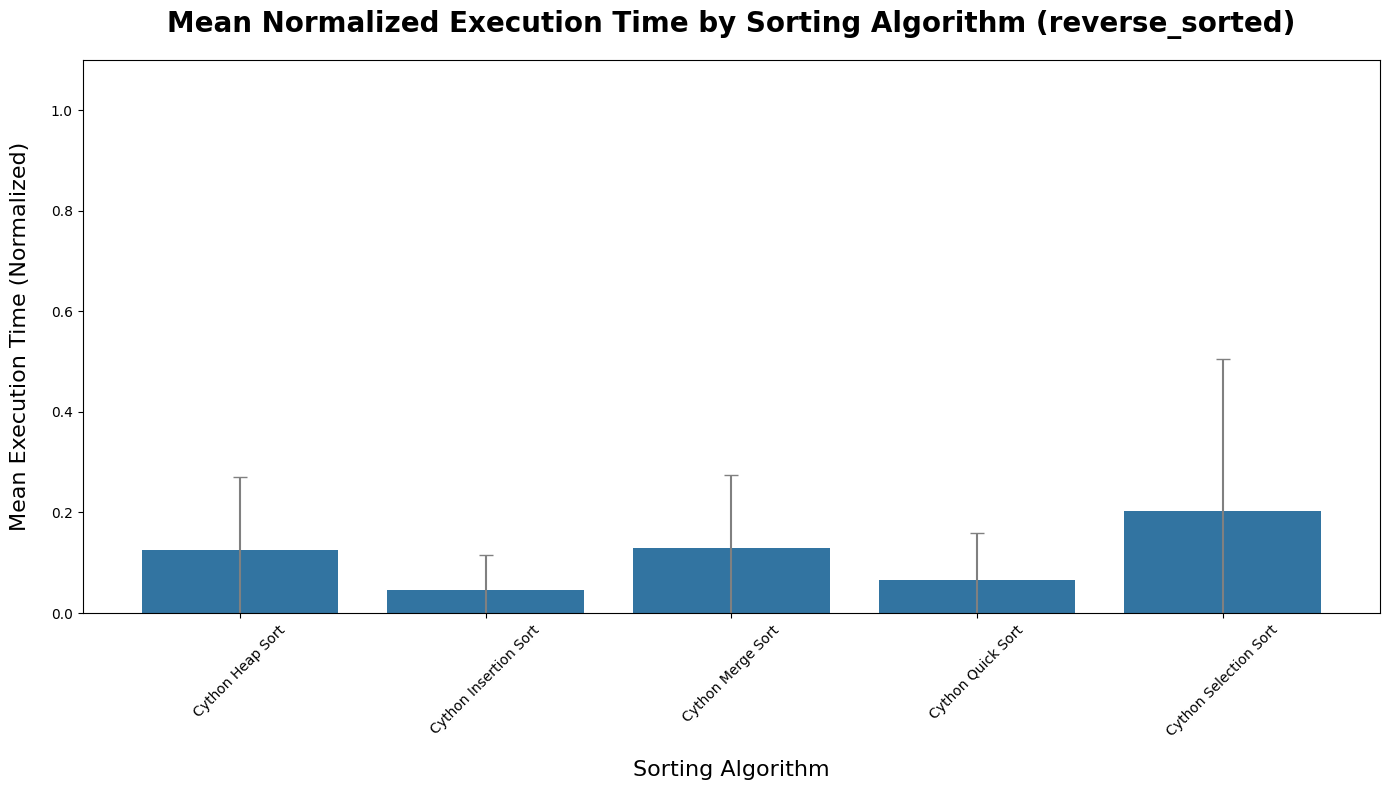

In [124]:
# Helper function to filter data by data_type
def filter_data_by_type(df, data_type):
    """
    Filters the DataFrame based on the specified data type.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame to filter.
    - data_type (str): The data type to filter by ('random', 'sorted', 'reverse_sorted').
    
    Returns:
    - pd.DataFrame: Filtered DataFrame.
    """
    return df[df['Data Type'] == data_type].reset_index(drop=True)

# Helper function to filter stats_combined by data_type
def filter_stats_by_type(df_stats, data_type):
    """
    Filters the stats_combined DataFrame based on the specified data type.
    
    Parameters:
    - df_stats (pd.DataFrame): The stats_combined DataFrame.
    - data_type (str): The data type to filter by ('random', 'sorted', 'reverse_sorted').
    
    Returns:
    - pd.DataFrame: Filtered stats_combined DataFrame.
    """
    return df_stats[df_stats['Data Type'] == data_type].reset_index(drop=True)

# Define the list of data types
data_types = ['random', 'sorted', 'reverse_sorted']

for dtype in data_types:
    print(f"\n--- Plotting for Data Type: {dtype} ---\n")
    
    # 1. Line Plot for Current Data Type
    plot_title_line = f'Normalized Execution Time by Sorting Algorithm and Input Size ({dtype})'
    save_path_line = f'line_plot_{dtype}.png'  # Optional: specify path to save
    create_line_plot(
        df=filter_data_by_type(df_results_normalized, dtype), 
        x='Size', 
        y='Execution Time (sec)_normalized', 
        hue='Algorithm', 
        title=plot_title_line, 
        xlabel='Input Size (Number of Elements)', 
        ylabel='Execution Time (Normalized)', 
        log_scale=True,
        save_path=None  # Set to save_path_line to save the plot
    )
    
    # 2. Bar Plot for Current Data Type
    plot_title_bar = f'Mean Normalized Execution Time by Sorting Algorithm ({dtype})'
    save_path_bar = f'bar_plot_{dtype}.png'  # Optional: specify path to save
    create_bar_plot_with_error(
        df=filter_stats_by_type(stats_combined, dtype), 
        x='Algorithm', 
        y='Execution Time (sec)_normalized_mean', 
        y_err='Execution Time (sec)_normalized_std', 
        hue=None,  # No hue to avoid redundancy
        title=plot_title_bar, 
        xlabel='Sorting Algorithm', 
        ylabel='Mean Execution Time (Normalized)', 
        ylim=(0, 1.1), 
        rotation=45,
        save_path=None  # Set to save_path_bar to save the plot
    )
    
    # 3. Interactive Line Plot for Current Data Type
    plot_title_interactive_line = f'Interactive: Normalized Execution Time by Sorting Algorithm and Input Size ({dtype})'
    save_path_interactive_line = f'interactive_line_plot_{dtype}.html'  # Optional: specify path to save
    create_interactive_line_plot(
        df=filter_data_by_type(df_results_normalized, dtype), 
        x='Size', 
        y='Execution Time (sec)_normalized', 
        color='Algorithm', 
        title=plot_title_interactive_line, 
        xlabel='Input Size (Number of Elements)', 
        ylabel='Execution Time (Normalized)', 
        log_scale=True,
        save_path=None  # Set to save_path_interactive_line to save the plot
    )
    
    # 4. Interactive Bar Plot for Current Data Type
    plot_title_interactive_bar = f'Interactive: Mean Normalized Execution Time by Sorting Algorithm ({dtype})'
    save_path_interactive_bar = f'interactive_bar_plot_{dtype}.html'  # Optional: specify path to save
    create_interactive_bar_plot(
        df=filter_stats_by_type(stats_combined, dtype), 
        x='Algorithm', 
        y='Execution Time (sec)_normalized_mean', 
        error_y='Execution Time (sec)_normalized_std', 
        color='Algorithm', 
        title=plot_title_interactive_bar, 
        xlabel='Sorting Algorithm', 
        ylabel='Mean Execution Time (Normalized)', 
        y_range=(0, 1.1),
        save_path=None  # Set to save_path_interactive_bar to save the plot
    )